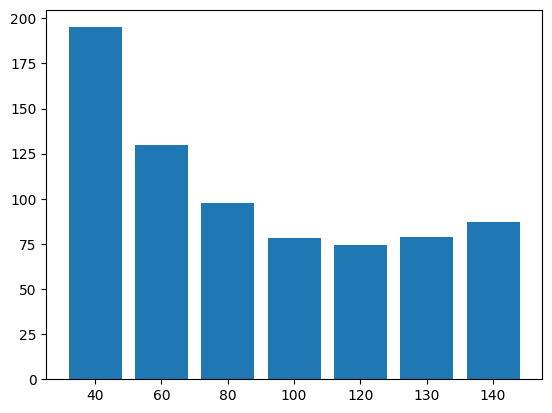

In [2]:
import matplotlib.pyplot as plt
import math

speed_and_consumption = { 
    40 : 10,
    60 : 13,
    80 : 15.5,
    100: 19.5,
    120: 25,
    130: 28,
    140: 31.5
} # source: https://www.reddit.com/r/electricvehicles/comments/mhqx9v/id3_vs_model_3_lr_vs_opel_corsa_e_speed/

battery_capacity = 45 # KWh
max_charge_capacity = 0.90 # %
fast_charge_time = 35 # minutes
journey_distance = 130 # km
distance_surplus_at_arrival_or_charger = 60 # km

speed_efficiency_curve_data = {}
for speed in speed_and_consumption:
    consumption = speed_and_consumption[speed]
    travel_distance_on_one_charge = (battery_capacity*max_charge_capacity/consumption*100) - distance_surplus_at_arrival_or_charger
    needed_charges = journey_distance / travel_distance_on_one_charge - 1 # the - 1 accounts for charging at the distination
    if needed_charges > 0:
        travel_time = journey_distance/speed*60 + fast_charge_time * needed_charges
    else:
        travel_time = journey_distance/speed*60
    speed_efficiency_curve_data[speed]=travel_time

# plot graph for visualizing difference
speed_names = list(speed_efficiency_curve_data.keys())
travel_time_stamps = list(speed_efficiency_curve_data.values())

plt.bar(range(len(speed_efficiency_curve_data)), travel_time_stamps, tick_label=speed_names)
plt.show()